In [2]:
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
%run 'Setup.py'

8 different classes: Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock.
objective 1: construct a classifier which, based on the features of a song, predicts its genre
objective 2: estimate its generalisation error under the 0–1 loss.
Features are real-valued, correspond to summary statistics (mean, sd, skewness, kurtosis, median, min, max) of 
time series of various music features, such as the chromagram or the Mel-frequency cepstrum.
Feature description: 

Feature description: 
chroma_cens: Chroma Energy Normalized (CENS, 12 chroma) - 84 features
chroma_cqt: Constant-Q chromagram (12 chroma) - 84 features
chroma_stft: Chromagram (12 chroma) - 84 features
mfcc: Mel-frequency cepstrum (20 coefficients) - 140 features
rmse: Root-mean-square - 7 features
spectral_bandwidth: Spectral bandwidth - 7 features
spectral_centroid: Spectral centroid - 7 features
spectral_contrast: Spectral contrast (7 frequency bands) - 49 features
spectral_rolloff: Roll-off freque

In [17]:
def create_feature_element_scatter(x_train, y_train, feature_x, element_x, feature_y, element_y, statistic,genre_column='Genre'):
    """
    Creates a scatter plot comparing two features at specified elements, colored by genre.

    Parameters:
    - x_train (pd.DataFrame): DataFrame containing the feature data.
    - y_train (pd.DataFrame): DataFrame containing the genre data.
    - feature_x (str): The name of the feature for the x-axis.
    - element_x (int): The element number for the x-axis feature.
    - feature_y (str): The name of the feature for the y-axis.
    - element_y (int): The element number for the y-axis feature.
    - genre_column (str): The column name in y_train that contains genre labels.

    The function assumes the column naming convention "{feature}.{statistic}.{element}".
    """
    # Merge y_train for genre information
    x_train_with_genre = x_train.merge(y_train, left_index=True, right_on='Id')

    # Construct column names based on inputs
    column_x = f"{feature_x}_{statistic}_{str(element_x).zfill(2)}"
    column_y = f"{feature_y}_{statistic}_{str(element_y).zfill(2)}"

    # Check if the specified columns exist in the DataFrame
    if column_x not in x_train_with_genre.columns or column_y not in x_train_with_genre.columns:
        print(f"Columns {column_x} or {column_y} not found in the dataset.")
        return

    # Create the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    sns.scatterplot(x=x_train_with_genre[column_x], y=x_train_with_genre[column_y],
                    hue=x_train_with_genre[genre_column], ax=ax, s=30, palette='rainbow')
    ax.set_title(f"{feature_y} STD vs {feature_x} STD on {element_x}th element")
    # Adjust limits if needed, or remove for automatic scaling
    ax.set(ylim=(0, 10))
    ax.set(xlim=(0, 15))
    fig.tight_layout()
    plt.show()

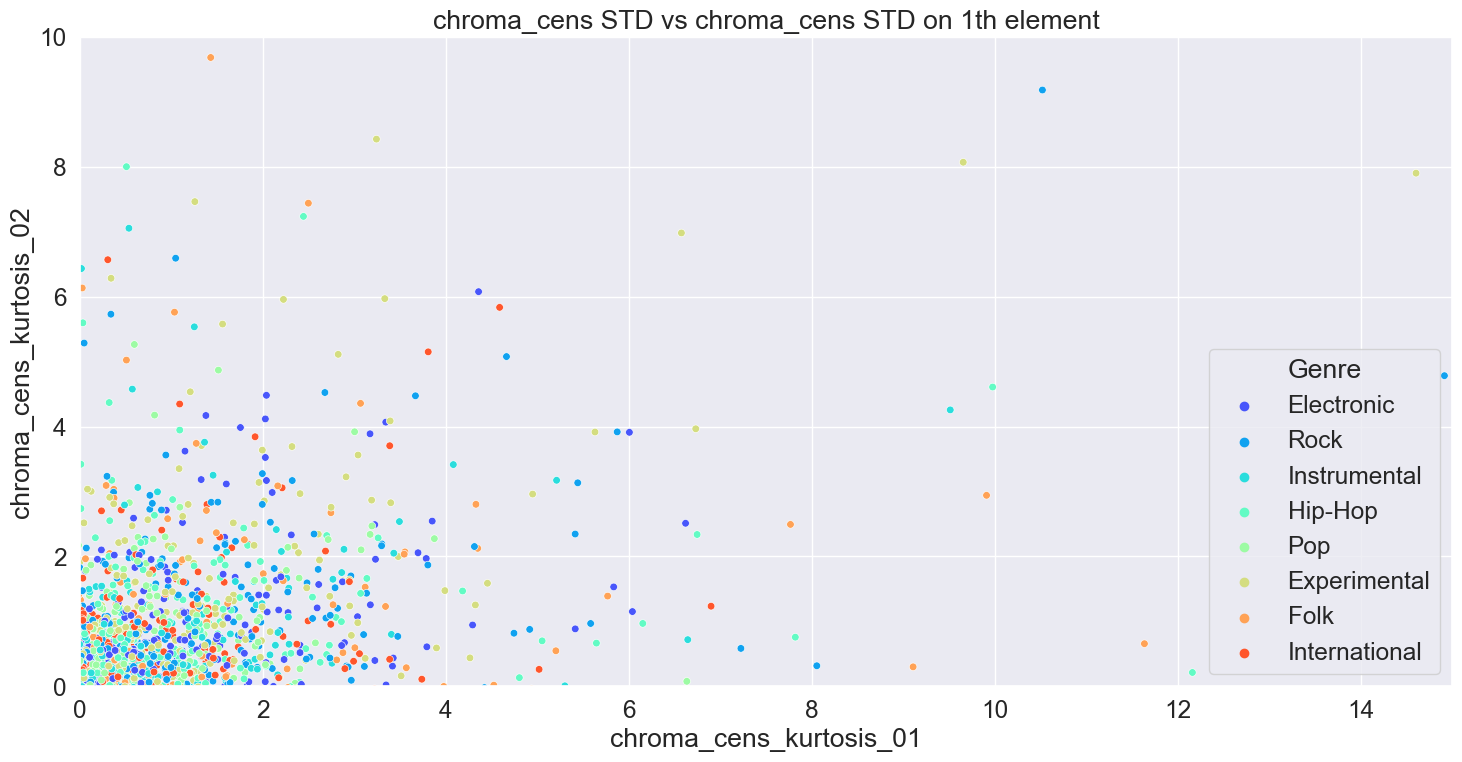

In [18]:
create_feature_element_scatter(x_train, y_train, 'chroma_cens', 1, 'chroma_cens', 2, statistic='kurtosis')

# Simple Test Split (80/20)

In [19]:
X = x_train
y= y_train

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1, shuffle = True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
x_train_with_genre = x_train.merge(y_train, left_index=True, right_on='Id')

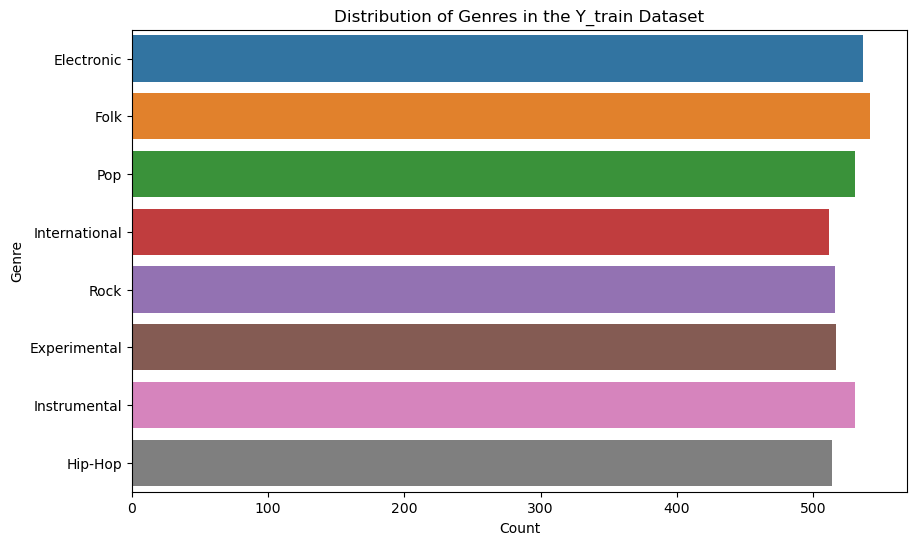

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, y='Genre')
plt.title('Distribution of Genres in the Y_train Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [10]:
print(x_train_with_genre.columns[250:300])

Index(['chroma_stft_std_11', 'chroma_stft_std_12', 'mfcc_kurtosis_01',
       'mfcc_kurtosis_02', 'mfcc_kurtosis_03', 'mfcc_kurtosis_04',
       'mfcc_kurtosis_05', 'mfcc_kurtosis_06', 'mfcc_kurtosis_07',
       'mfcc_kurtosis_08', 'mfcc_kurtosis_09', 'mfcc_kurtosis_10',
       'mfcc_kurtosis_11', 'mfcc_kurtosis_12', 'mfcc_kurtosis_13',
       'mfcc_kurtosis_14', 'mfcc_kurtosis_15', 'mfcc_kurtosis_16',
       'mfcc_kurtosis_17', 'mfcc_kurtosis_18', 'mfcc_kurtosis_19',
       'mfcc_kurtosis_20', 'mfcc_max_01', 'mfcc_max_02', 'mfcc_max_03',
       'mfcc_max_04', 'mfcc_max_05', 'mfcc_max_06', 'mfcc_max_07',
       'mfcc_max_08', 'mfcc_max_09', 'mfcc_max_10', 'mfcc_max_11',
       'mfcc_max_12', 'mfcc_max_13', 'mfcc_max_14', 'mfcc_max_15',
       'mfcc_max_16', 'mfcc_max_17', 'mfcc_max_18', 'mfcc_max_19',
       'mfcc_max_20', 'mfcc_mean_01', 'mfcc_mean_02', 'mfcc_mean_03',
       'mfcc_mean_04', 'mfcc_mean_05', 'mfcc_mean_06', 'mfcc_mean_07',
       'mfcc_mean_08'],
      dtype='object')


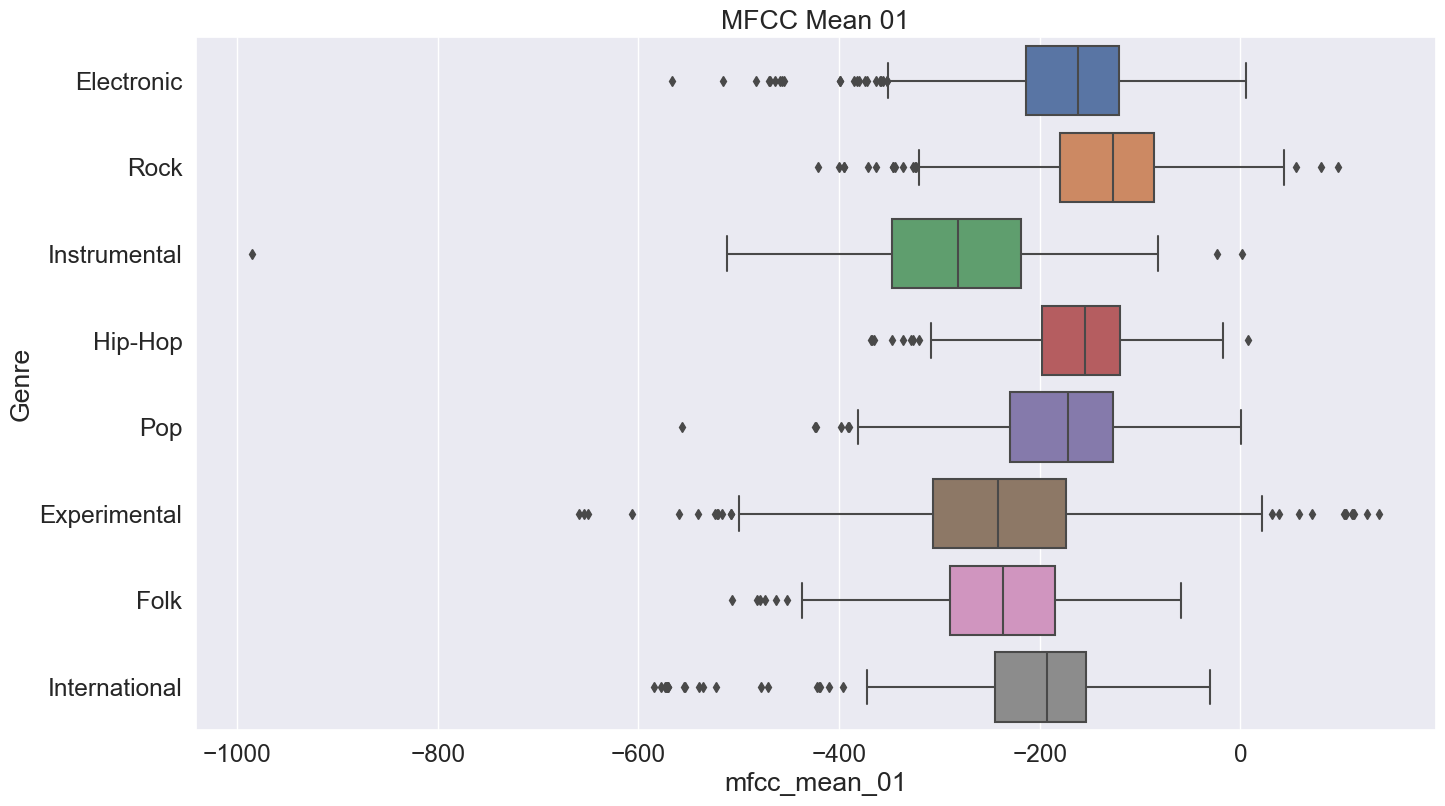

In [13]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=x_train_with_genre["mfcc_mean_01"], y = x_train_with_genre['Genre'], ax=ax)
ax.set_title("MFCC Mean 01")
sns.set(font_scale = 1.6)
plt.show()

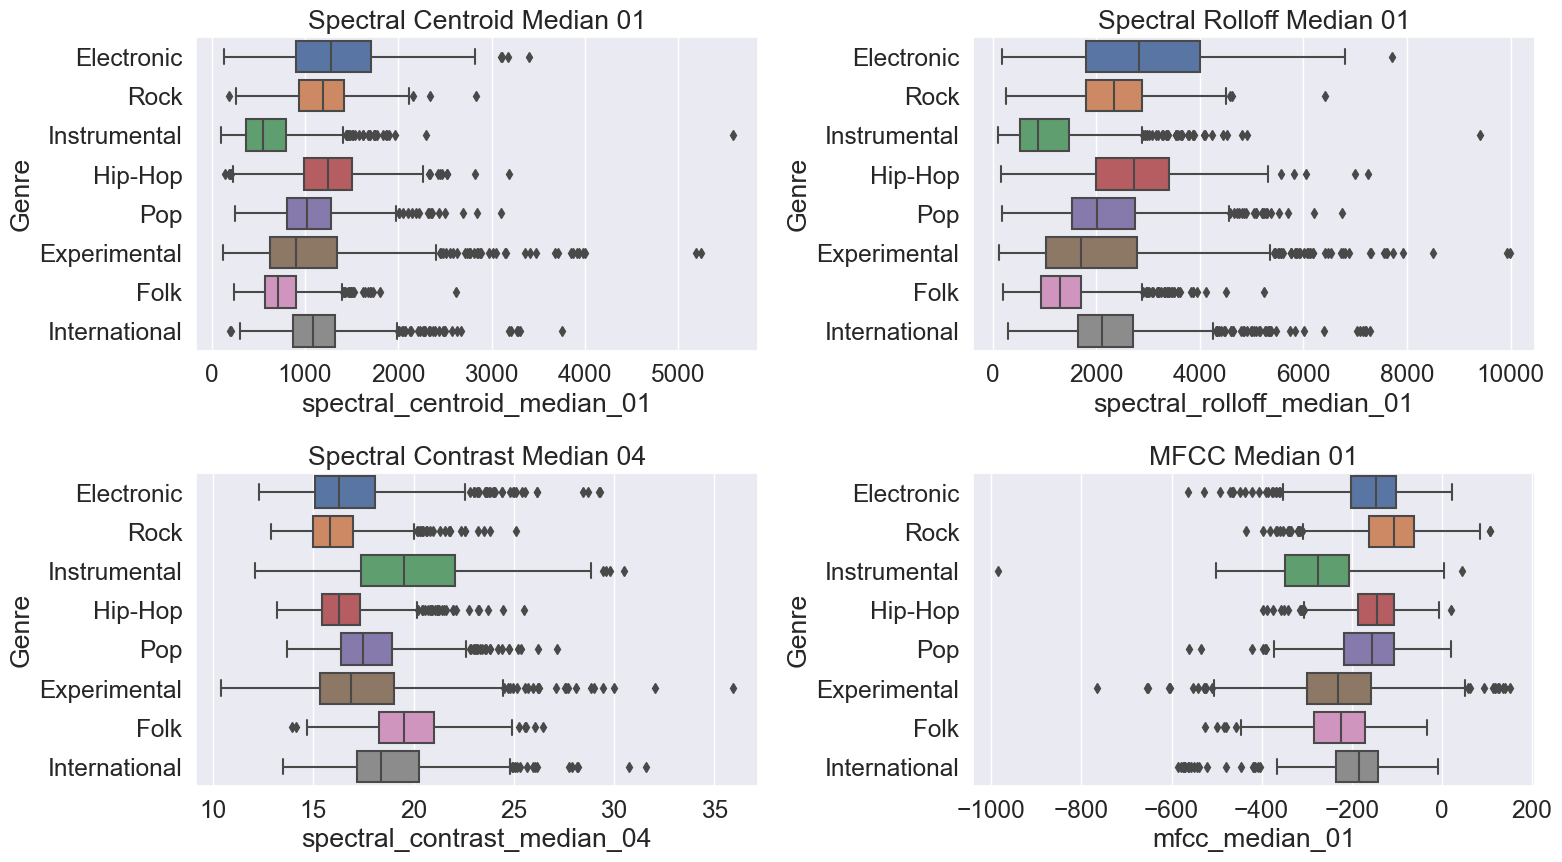

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x_train_with_genre' is your dataframe and it includes 'Genre' and the features specified.
# Replace 'x_train_with_genre' with your actual dataframe variable name.

# Create the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# Top-left subplot for spectral_centroid_median_01
sns.boxplot(x='spectral_centroid_median_01', y='Genre', data=x_train_with_genre, ax=axs[0, 0])
axs[0, 0].set_title('Spectral Centroid Median 01')

# Top-right subplot for spectral_rolloff_median_01
sns.boxplot(x='spectral_rolloff_median_01', y='Genre', data=x_train_with_genre, ax=axs[0, 1])
axs[0, 1].set_title('Spectral Rolloff Median 01')

# Bottom-left subplot for spectral_contrast_median_04
sns.boxplot(x='spectral_contrast_median_04', y='Genre', data=x_train_with_genre, ax=axs[1, 0])
axs[1, 0].set_title('Spectral Contrast Median 04')

# Bottom-right subplot for mfcc_median_01
sns.boxplot(x='mfcc_median_01', y='Genre', data=x_train_with_genre, ax=axs[1, 1])
axs[1, 1].set_title('MFCC Median 01')

# Adjust the font scale for better readability
sns.set(font_scale=1.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# PCA

In [7]:
train_data_with_labels = x_train.join(y_train)

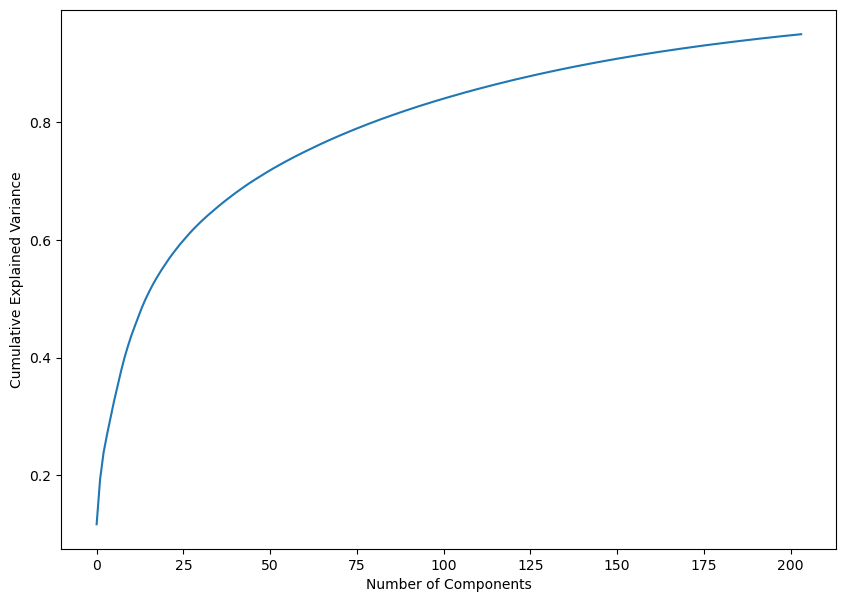

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data_with_labels.iloc[:, :-1])   #identifier

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# Apply PCA to retain 80% of the variance
pca_80 = PCA(n_components=0.8)
X_pca_80 = pca_80.fit_transform(X_scaled)
print(X_pca_80)

[[ 11.3249599    1.28269534   2.85446355 ...   0.41333362   0.15766307
    0.37912595]
 [  7.03788004   0.68443286   2.27028672 ...   0.90994038  -0.22135909
   -0.45559738]
 [  3.73086773   6.94967794  -0.73945331 ...  -0.35113453  -1.01975673
   -0.33827355]
 ...
 [ -4.39988863  -2.14111024   0.99366872 ...   0.72159892   0.42360691
    0.44522594]
 [ -3.73248346  13.68087338  -1.90655327 ...   0.49289549   0.07026811
   -0.44257067]
 [-14.80826708  -0.0886734    7.6399725  ...  -0.10395294  -3.41671995
    1.10096471]]


# Multi Class Logistic Regression

In [6]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train.values.ravel())
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

Logistic Regression Accuracy: 0.5133333333333333


In [7]:
log_reg_cv = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)

scores = cross_val_score(log_reg_cv, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.51071429 0.49880952 0.50952381 0.51428571 0.50357143]
Mean accuracy: 0.5073809523809524


In [ ]:
model_logreg = LogisticRegression(max_iter=500,random_state= 1, penalty='none')
model_logreg.fit(X_train, y_train)

In [ ]:
cv_score = cross_val_score(model_logreg, X_train, y_train, cv = 5)

In [ ]:
print("mean CV Score:",round(cv_score.mean(),3))
print("Train score:", round(model_logreg.score(X_train, y_train),3))
print("Test score:", round(model_logreg.score(X_test, y_test),3))

## Elastic Net (very poor)

In [ ]:
model_LgR = LogisticRegression(max_iter=200, random_state= 1)
params = {'C': [0.001],
          'l1_ratio' : [1],
          'penalty': ['elasticnet'],
          'solver': ['saga']}

gs = GridSearchCV(estimator= model_LgR, param_grid= params,  cv= 5,scoring='accuracy',n_jobs = -1, verbose=3)
gs.fit(X_train, y_train)

In [ ]:
best_LgR = gs.best_estimator_
print("Best estimator :", gs.best_estimator_.get_params())
print("Train score:", round(best_LgR.score(X_train, y_train),4))
print("Test score:", round(best_LgR.score(X_test, y_test),4))
print("Best CV score :", gs.best_score_)

# Decision Tree

In [ ]:
model_decTree = DecisionTreeClassifier(criterion='gini', max_features=1.0, max_depth= 30, random_state=1)
model_decTree.fit(X_train, y_train)
cv_score = cross_val_score(model_decTree, X_train, y_train)

In [ ]:
print("Mean CV Score:",round(cv_score.mean(),4))
print("Train score:", round(model_decTree.score(X_train, y_train),3))
print("Test score:", round(model_decTree.score(X_test, y_test),3))

# Random Forest

In [21]:
model_RF = RandomForestClassifier(n_estimators=200 ,criterion='gini', max_features='auto', max_depth= 30, random_state=1, verbose =2)
model_RF.fit(X_train, y_train)
cv_score = cross_val_score(model_RF, X_train, y_train, cv = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 20

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [22]:
print("CV scores:", cv_score)
print("Mean CV Score:",round(cv_score.mean(),4))
print("Train score:", round(model_RF.score(X_train, y_train),3))
print("Test score:", round(model_RF.score(X_test, y_test),3))

CV scores: [0.53333333 0.55238095 0.5297619  0.55       0.57380952]
Mean CV Score: 0.5479


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Train score: 1.0
Test score: 0.558


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


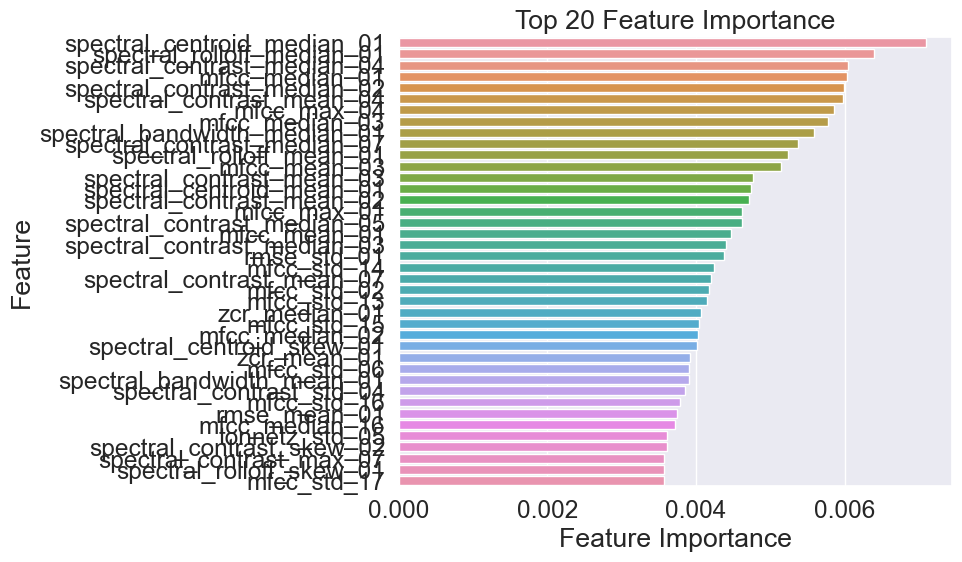

In [23]:
feat_imp = pd.DataFrame(list(zip(X.columns, model_RF.feature_importances_)), columns=['feature','feat_importance']).sort_values(by='feat_importance', ascending=False)
feat_imp_top20 = feat_imp.head(40)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

sns.barplot(x = feat_imp_top20.feat_importance, y = feat_imp_top20.feature, orient='h', ax=ax)
ax.set_title('Top 20 Feature Importance')
ax.set_ylabel('Feature')
ax.set_xlabel('Feature Importance')
fig.tight_layout()
plt.show()

In [26]:
print(feat_imp_top20.feature)

409     spectral_centroid_median_01
465      spectral_rolloff_median_01
437     spectral_contrast_median_04
312                  mfcc_median_01
435     spectral_contrast_median_02
430       spectral_contrast_mean_04
275                     mfcc_max_04
314                  mfcc_median_03
402    spectral_bandwidth_median_01
440     spectral_contrast_median_07
464        spectral_rolloff_mean_01
294                    mfcc_mean_03
429       spectral_contrast_mean_03
408       spectral_centroid_mean_01
428       spectral_contrast_mean_02
272                     mfcc_max_01
438     spectral_contrast_median_05
292                    mfcc_mean_01
436     spectral_contrast_median_03
398                     rmse_std_01
385                     mfcc_std_14
433       spectral_contrast_mean_07
373                     mfcc_std_02
384                     mfcc_std_13
514                   zcr_median_01
386                     mfcc_std_15
313                  mfcc_median_02
411       spectral_centroid_

## Bagged Random Forest

In [156]:
base_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1, verbose=2)
model_RF_bagged = BaggingClassifier(base_estimator=base_rf, n_estimators=10, random_state=1, verbose=2)
model_RF_bagged.fit(X_train, y_train.values.ravel())
cv_score = cross_val_score(model_RF_bagged, X_train, y_train.values.ravel(), cv=5)


/Users/max/anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/max/anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.2s finished
/Users/max/anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.3s finished
/Users/max/anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 20

KeyboardInterrupt: 

In [11]:
print("CV scores:", cv_score)
print("Mean CV Score:",round(cv_score.mean(),4))
print("Train score:", round(model_RF_bagged.score(X_train, y_train),3))
print("Test score:", round(model_RF_bagged.score(X_test, y_test),3))

NameError: name 'model_RF_bagged' is not defined

# More Cross Validation

### Grid Search

Careful, heavy compute!

In [ ]:
model_RF = RandomForestClassifier(criterion='gini', max_features='auto', max_depth= 30, random_state=1, verbose =2)

params = {'n_estimators': [200],
          'max_features' : [0.3, 0.5, 0.8, 1],
          'max_depth': [10, 30, 60, None]}

gs = GridSearchCV(estimator= model_RF, param_grid= params,  cv= 5,scoring='accuracy',n_jobs = -1, verbose=3)
gs.fit(X_train, y_train)

In [152]:
best_RF = gs.best_estimator_

print("Best estimator :", gs.best_estimator_.get_params())
print("Train score:", round(best_RF.score(X_train, y_train),4))
print("Test score:", round(best_RF.score(X_test, y_test),4))
print("Best CV score :", gs.best_score_)



Best estimator : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 0.3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 2, 'warm_start': False}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Train score: 1.0
Test score: 0.5494
Best CV score : 0.5502380952380953


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


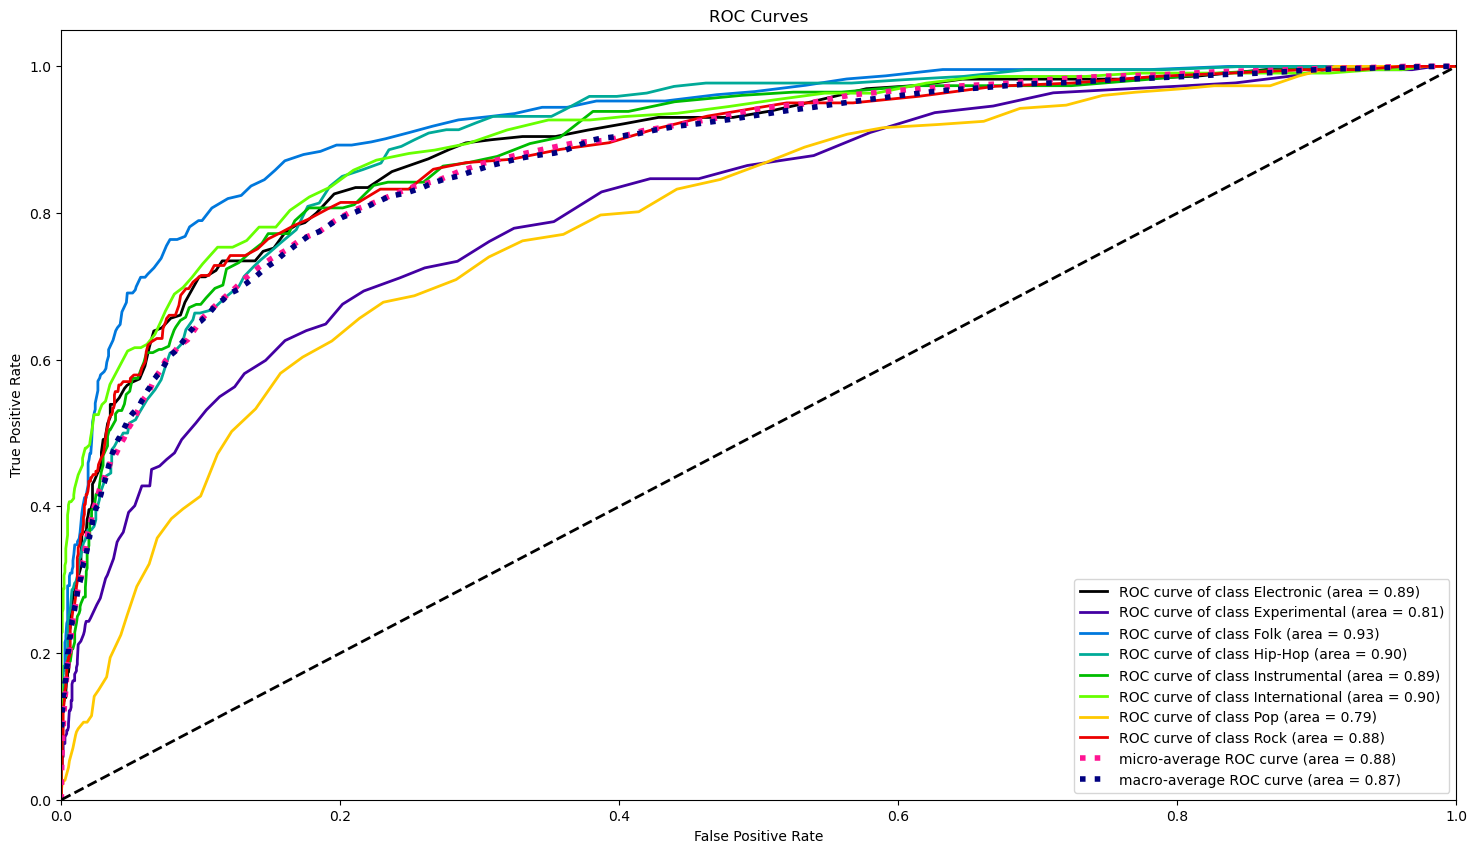

In [154]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
skplt.metrics.plot_roc(y_test, best_RF.predict_proba(X_test), ax=ax)
plt.show()


## Random Search

Careful, heavy compute!


In [ ]:
rf = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

random_search.fit(X_train, y_train.values.ravel())

In [ ]:
print("Best parameters found (Random Search): ", random_search.best_params_)
print("Best accuracy found (Random Search): ", random_search.best_score_)

# Ada Boost

## Base Decision Tree

In [8]:
base_estimator = DecisionTreeClassifier(max_depth=5, max_features=0.3)
model_AB = AdaBoostClassifier(estimator = base_estimator, n_estimators = 100, random_state=1)
model_AB.fit(X_train, y_train)
cv_score = cross_val_score(model_AB, X_train, y_train, cv = 5)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    max_features=0.3),
                   n_estimators=100, random_state=1)

In [9]:
print("Mean CV Score:",round(cv_score.mean(),4))
print("Train score:", round(model_AB.score(X_train, y_train),3))
print("Test score:", round(model_AB.score(X_test, y_test),3))

Train score: 0.91
Test score: 0.412


## Base Logistic Regression

In [ ]:
base_estimator = LogisticRegression(max_iter=100,random_state= 1, penalty='l2', verbose = 2)
model_AB = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = 200, random_state=1)
model_AB.fit(X_train, y_train)

In [29]:
print("Mean CV Score:",round(cv_score.mean(),4))
print("Train score:", round(model_AB.score(X_train, y_train),3))
print("Test score:", round(model_AB.score(X_test, y_test),3))

Mean CV Score: 0.5244
Train score: 0.473
Test score: 0.459


# XGBoost

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels to integers
y_encoded = label_encoder.fit_transform(y)

# Now split the dataset with the encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.3, random_state=1, shuffle=True)

# Continue with scaling as before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Proceed to train your XGBoost model as before, using y_train and y_test for fitting and evaluation

In [75]:

# Initialize the XGBoost classifier
# Specify 'multi:softmax' for multi-class classification and 'num_class' for the number of classes
model_xgb = XGBClassifier(objective='multi:softmax', num_class=8, n_estimators=200, max_depth=30, random_state=1, eval_metric='mlogloss', use_label_encoder=False, verbosity=2)

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Evaluate the model using cross-validation on the training data
cv_score_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores for XGBoost:", cv_score_xgb)
print("Mean CV Score for XGBoost:", np.mean(cv_score_xgb))


Cross-validation scores for XGBoost: [0.55       0.56309524 0.57261905 0.58452381 0.60238095]
Mean CV Score for XGBoost: 0.5745238095238095


# Stacked Models

## Stacked Model Log Reg + Random Forest

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the base models
base_models = [
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1, verbose=2))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train.values.ravel())

# Predictions
y_pred_stack = stacking_classifier.predict(X_test)

In [14]:
# Evaluate performance
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred_stack)}")


Stacking Model Accuracy: 0.5783333333333334


## Stacked with Regularised Log Regression

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the base models
base_models = [
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1, verbose=2))
]

# Define the meta-model with L1 regularization
meta_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000, random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train.values.ravel())

# Predictions
y_pred_stack = stacking_classifier.predict(X_test)

In [41]:

# Optionally, evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Accuracy of the stacked model with L1 regularization: {accuracy}")


Accuracy of the stacked model with L1 regularization: 0.5755555555555556


## Stacked with Reg Log Regression, RF, KNN (Tuned)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the base models
base_models = [
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1, verbose=2)),
    # Adding KNeighborsClassifier as a proxy for KMeans with Manhattan distance
    ('knn', KNeighborsClassifier(n_neighbors=4, metric='manhattan'))
]

# Define the meta-model with L1 regularization
meta_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000, random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Assuming X_train, y_train, X_test are defined and preprocessed
# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train.values.ravel())

# Predictions
y_pred_stack = stacking_classifier.predict(X_test)

# Evaluate the model


In [64]:
accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5905555555555555


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Define the base models
base_models = [
    ('log_reg', make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', random_state=42))),
    ('random_forest', RandomForestClassifier(random_state=1)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(metric='manhattan')))
]

# Define the meta-model
meta_model = LogisticRegression(penalty='l1', solver='saga', random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Define the parameter grid
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [10, 20, 30],
    'knn__kneighborsclassifier__n_neighbors': [3, 5],
    'final_estimator__C': [0.1, 1.0, 10.0]
}

# Create the grid search
grid_search = GridSearchCV(estimator=stacking_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train.values.ravel())

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predictions with the best model
y_pred_stack = grid_search.predict(X_test)

# Evaluate the model

/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Traceback (most recent call last):
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/multiprocessing/queues.py", line 113, in get
    if not self._poll(timeout):
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/multiprocessing/connection.py", line 424, in _poll
    r = wait([self], timeout)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt


Process LokyProcess-17:
Traceback (most recent call last):
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/joblib/_parallel_backends.py", line 620, in __call__
    return self.func(*args, **kwargs)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/joblib/parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/joblib/parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/max/anaconda3/envs/sml-practical/lib/python3.10/site-packages/sklearn/ensemble/_sta

Accuracy: 0.5905555555555555


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

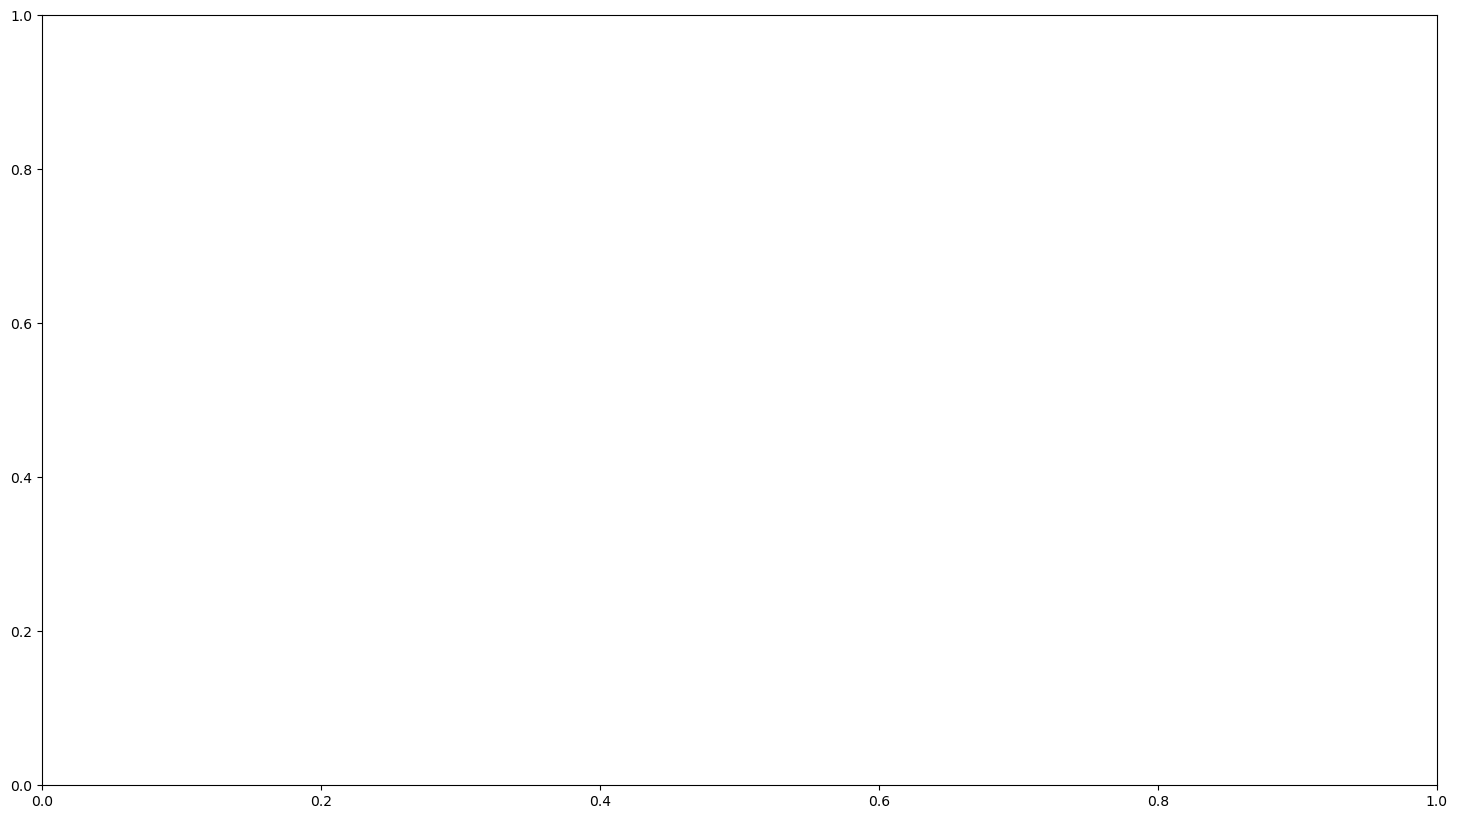

In [65]:
accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Accuracy: {accuracy}")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
skplt.metrics.plot_roc(y_test, grid_search.predict_proba(X_test), ax=ax)
plt.show()

## Stacked with Log_Reg, RF and Decision Tree

In [36]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Define the base models
base_models = [
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1)),
    ('decisiontree', DecisionTreeClassifier(max_depth=5, max_features=0.3))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier on the scaled data
stacking_classifier.fit(X_train, y_train.values.ravel())

# Predictions
y_pred_stack = stacking_classifier.predict(X_test)

In [66]:

# Evaluate performance
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred_stack)}")


Stacking Model Accuracy: 0.5905555555555555


 # PCA Data Set

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset's features and target respectively

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1, shuffle=True)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducing the dimensions with PCA, preserving 80% of the variance
pca = PCA(n_components=0.8, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Training the RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='auto', max_depth=30, random_state=1, verbose=2)
model_RF.fit(X_train_pca, y_train)

# Evaluating the model using cross-validation
cv_score = cross_val_score(model_RF, X_train_pca, y_train, cv=5)

# Optional: Evaluate the model on the test set
y_pred = model_RF.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)

print("Cross-Validation Scores:", cv_score)
print("Mean CV Score:", cv_score.mean())
print("Test Set Accuracy:", test_accuracy)


In [ ]:
%run 'Setup.py'